## Perspective Transformation

In [3]:
# Import for OpenCV
import cv2

import numpy as np
import matplotlib.pyplot as plt 

(750, 500, 3)

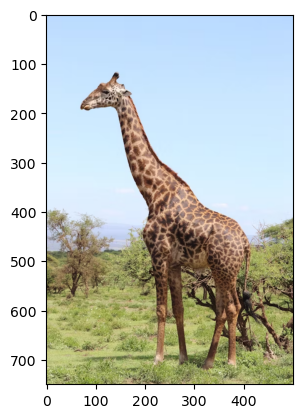

In [ ]:

# Load the image and get it as BGR
image = cv2.imread("./Giraf.jpg")

# convert to RGB image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


In [9]:
# Get the image matrix dim
image_rgb.shape

# get rows, cols
rows, cols, _ = image_rgb.shape

# Make perspective transformation
# define 4 points coordinates for the image
input_points = np.float32([[50,50], [cols - 50, 50], [50, rows-50], [cols-50, rows-50]]) 
output_points = np.float32([[10,100], [cols - 100, 50], [100, rows-50], [cols-50, rows-100]]) 

'''
Transformation matrix for the perspective transformation

3 x 3
a, b, c
d, e, f
g, h, l

a,b,c are responsible for horizontal scaling, rotation and translation
d,e,f are responsible for vertical scaling, rotation and translation
g,h   Prospective components that account for the depth and skew

'''

M = cv2.getPerspectiveTransform(input_points,output_points)
print(M)

[[ 9.94218993e-01  1.57389635e-01 -4.74808061e+01]
 [-1.25057125e-01  1.05511379e+00  5.44934192e+01]
 [ 2.37638241e-05  1.75486701e-04  1.00000000e+00]]


(-0.5, 499.5, 749.5, -0.5)

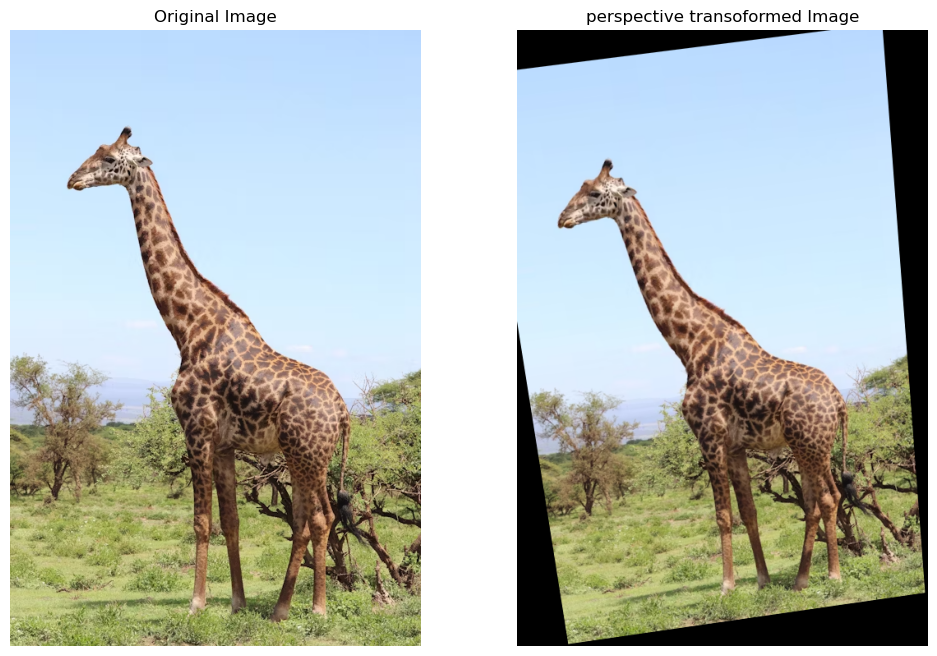

In [12]:
perspectivce_image = cv2.warpPerspective(image_rgb, M, (cols,rows))

# Show all resized images with each algorithm
plt.figure(figsize=(12,8))

# Show the original Image
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Show the perspective Image
plt.subplot(1,2,2)
plt.imshow(perspectivce_image)
plt.title("perspective transoformed Image")
plt.axis("off")

## Afine Transformation

In [13]:
# define 4 points coordinates for the image
input_points = np.float32([[50,50], [200, 50], [50, 200]]) 
output_points = np.float32([[10,100], [200, 50], [100, 250]]) 
M = cv2.getAffineTransform(input_points,output_points)

Affine_image = cv2.warpAffine(image_rgb, M, (cols,rows))

(-0.5, 499.5, 749.5, -0.5)

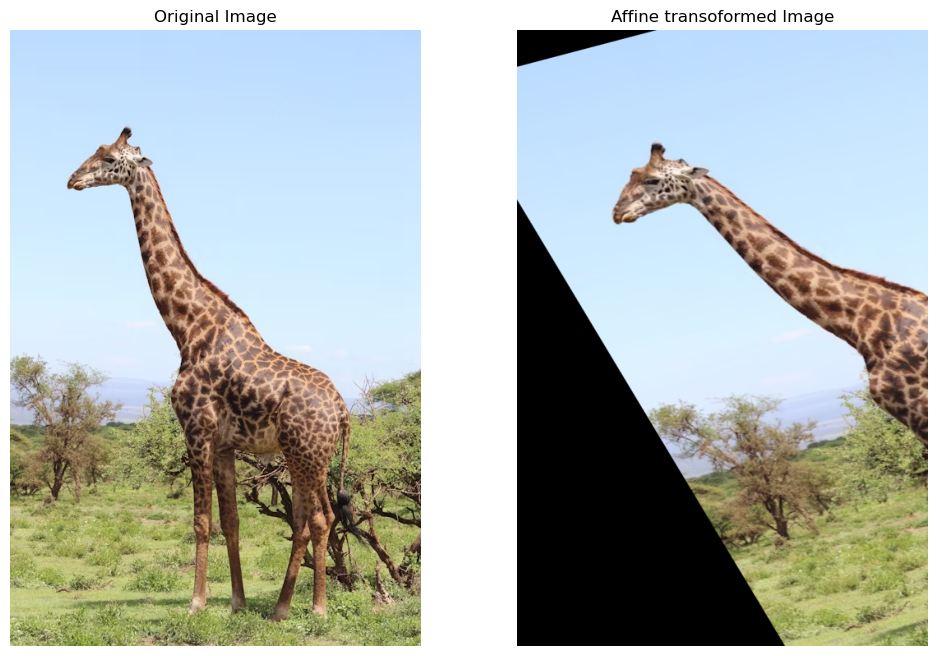

In [ ]:
# Show all resized images with each algorithm
plt.figure(figsize=(12,8))

# Show the original Image
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Show the perspective Image
plt.subplot(1,2,2)
plt.imshow(Affine_image)
plt.title("Affine transoformed Image")
plt.axis("off")

## Rotation 

In [17]:
angle = 45
center = (cols // 2, rows // 2)
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image_rgb, M, (cols,rows))

(-0.5, 499.5, 749.5, -0.5)

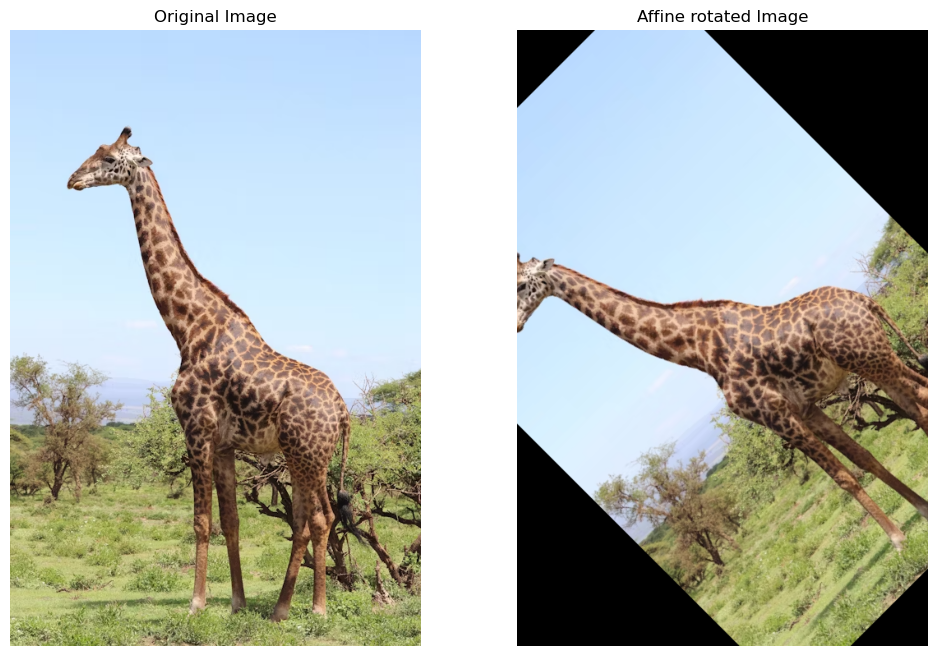

In [18]:
# Show all resized images with each algorithm
plt.figure(figsize=(12,8))

# Show the original Image
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Show the perspective Image
plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Affine rotated Image")
plt.axis("off")